# Lab 3: Data Preprocessing

In this assignment, we will learn how to explore the raw data and preprocess it. 

The dataset we are going to exlore is an insurance data. It provides different features of each user as follows:
* age: age of the user
* sex: gender of the user
* bmi: body mass index, providing an understanding of body
* children: number of children covered by health insurance / number of dependents
* smoker: smoker or not
* region: the user's residential area in the US, northeast, southeast, southwest, northwest.

Additionally, the medical cost of each user is also provided: 
* charges: the medical cost 

Please follow Lecture 5_data_understanding and Lecture 6_data_preprocessing to complete following questions. 

### Q1. Load data with Pandas and output the basic information of this dataset, such as the features and their data types.  Which features are numerical features and which users are categorical features?


In [48]:
# your code

import pandas as pd
df = pd.read_csv('insurance.csv')

#describe() provides statistics of numerical features. Commented out for now
#df.describe()

#info() outputs basic information of the data set, including features and their data types
df.info()

#Print statements of which features are numerical and which are categorical. Commented out for now
#print('The numerical features are age, bmi, children, and charges')
#print('The categorical features are sex, smoker, and region')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Q2. Check whether there are missing values in this dataset.

In [49]:
# your code
print(df.shape)
df.isnull().sum()
#Since the sum of the null values for each feature is zero foe every feature, there are no missing values in this dataset

(1338, 7)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Q3. Visualize all numerical features with histogram plot to see the distribution of each numerical feature. 


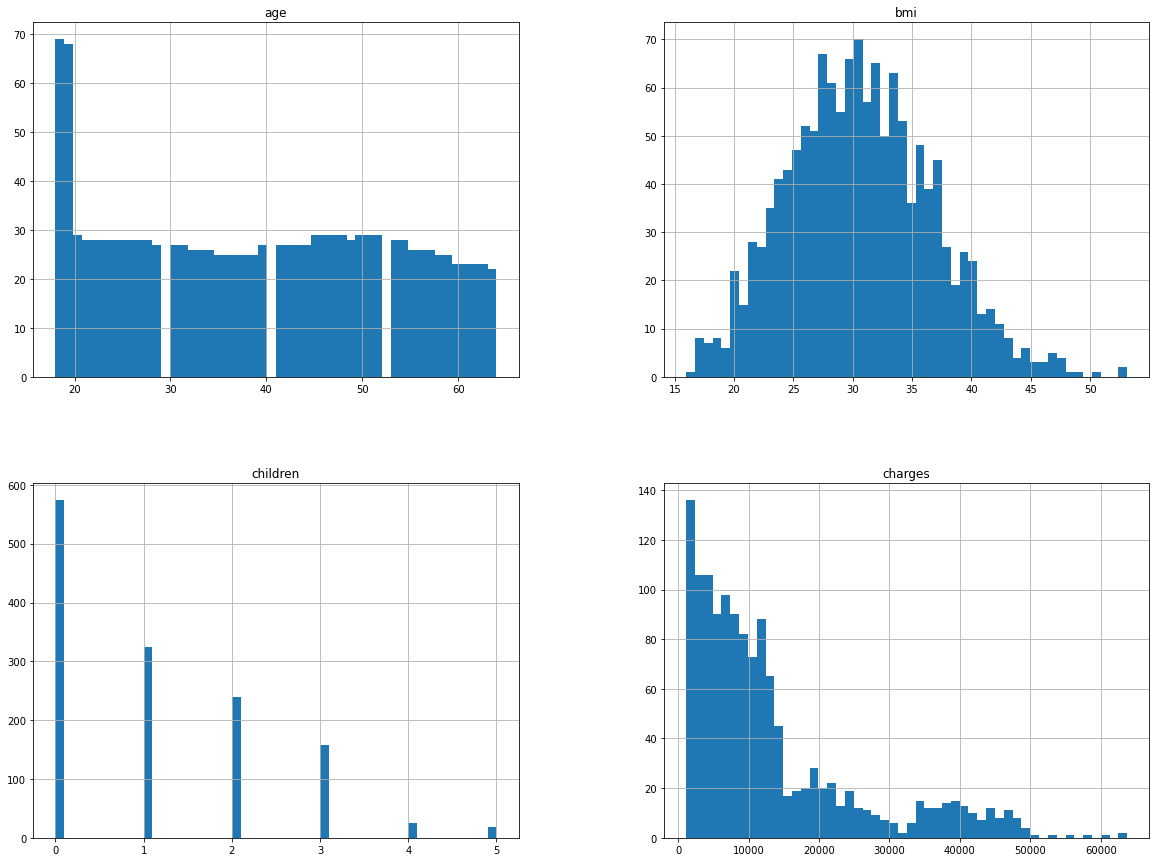

In [50]:
# your code
import matplotlib.pyplot as plt

#hist() allows one to see the distribution of only the numerical features (automatic) with a histogram plot
#the number of bins set is up to the user. It appears 50 bins does a good job of displaying the data.
df.hist(bins = 50, figsize = (20,15))
plt.show()


### Q4. Use corr() function of Pandas to show the correlation between different numerical features

In [51]:
# your code

#corr function shows the correlation of only the numerical features (automatic)
hcorr = df.corr()
#Setting a style for the background in hcorr helps to make the correlation more visible
hcorr.style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Q5. For all categorical features, use bar plot to visualize the number of users within each category.

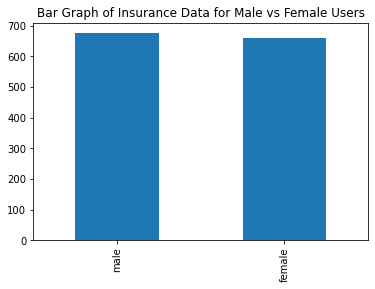

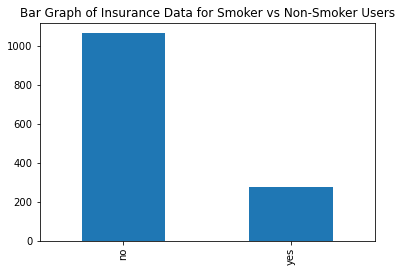

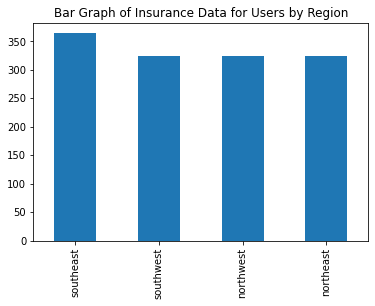

In [52]:
# your code

df['sex'].value_counts().plot(kind = 'bar')
plt.title('Bar Graph of Insurance Data for Male vs Female Users')
plt.show()

df['smoker'].value_counts().plot(kind = 'bar')
plt.title('Bar Graph of Insurance Data for Smoker vs Non-Smoker Users')
plt.show()

df['region'].value_counts().plot(kind = 'bar')
plt.title('Bar Graph of Insurance Data for Users by Region')
plt.show()

### Q6. Convert all categorical features into numerical features with Label Encoding or One-Hot Encoding

In [53]:
# your code
#I will use label encoding, where each categorical feature is converted into an integer value
from sklearn.preprocessing import LabelEncoder

#For gender:
#This print statement shows the initial labels and counts for sex
print(df['sex'].value_counts())
labelencoderSex = LabelEncoder()
df['sex'] = labelencoderSex.fit_transform(df['sex'])
#This print statement shows that male is now represented by 1 and female 0
print(df['sex'].value_counts())

#For smoker:
#This print statement shows the initial labels and counts for smoker
print(df['smoker'].value_counts())
labelencoderSmoker = LabelEncoder()
df['smoker'] = labelencoderSmoker.fit_transform(df['smoker'])
#This print statement shows that yes is now represented by 1 and no 0
print(df['smoker'].value_counts())

#For region:
#This print statement shows the initial labels and counts for region
print(df['region'].value_counts())
labelencoderRegion = LabelEncoder()
df['region'] = labelencoderRegion.fit_transform(df['region'])
#This print statement shows that southeast is now represented by 2, soutwest by 3, northwest by 1, and northeast by 0
print(df['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64
1    676
0    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
0    1064
1     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
2    364
3    325
1    325
0    324
Name: region, dtype: int64


### Q7. Normalize all numerical features

In [58]:
# your code
#The TA said we can use either Min-max normalization OR Z-score normalization. I will use Z-score normalization
import numpy as np
np.set_printoptions(precision = 4)

#Since we converted the categorical features to numerical features, all features are numerical. By the wording of the question, we should then normalize all features
df = df.values.astype(dtype = np.float32)
print("Original Data")
print(df)

x_mean = np.mean(df, axis = 0)
x_std = np.std(df, axis = 0)

print('Mean and Std')
print(x_mean)
print(x_std)

#The formula for the Z-score normalization is each value minus the mean divided by the standard deviation, so that is what we will do
df = (df-x_mean)/x_std
print("Scaling Data: ")
print(df)

#Note: I ASKED THE TA AND HE SAID TO UPDATE OUR DATAFRAME WITH NORMALIZED NUMBERS
#Since we were taught to normalize using numpy, the end result data frame will be an array of numbers without the proper formatting and labels seen with the original dataset

Original Data
[[1.9000e+01 0.0000e+00 2.7900e+01 ... 1.0000e+00 3.0000e+00 1.6885e+04]
 [1.8000e+01 1.0000e+00 3.3770e+01 ... 0.0000e+00 2.0000e+00 1.7256e+03]
 [2.8000e+01 1.0000e+00 3.3000e+01 ... 0.0000e+00 2.0000e+00 4.4495e+03]
 ...
 [1.8000e+01 0.0000e+00 3.6850e+01 ... 0.0000e+00 2.0000e+00 1.6298e+03]
 [2.1000e+01 0.0000e+00 2.5800e+01 ... 0.0000e+00 3.0000e+00 2.0079e+03]
 [6.1000e+01 0.0000e+00 2.9070e+01 ... 1.0000e+00 1.0000e+00 2.9141e+04]]
Mean and Std
[3.9207e+01 5.0523e-01 3.0663e+01 1.0949e+00 2.0478e-01 1.5157e+00
 1.3270e+04]
[1.4045e+01 4.9997e-01 6.0959e+00 1.2050e+00 4.0354e-01 1.1045e+00
 1.2105e+04]
Scaling Data: 
[[-1.4388 -1.0105 -0.4533 ...  1.9706  1.3439  0.2986]
 [-1.51    0.9896  0.5096 ... -0.5075  0.4385 -0.9537]
 [-0.798   0.9896  0.3833 ... -0.5075  0.4385 -0.7287]
 ...
 [-1.51   -1.0105  1.0149 ... -0.5075  0.4385 -0.9616]
 [-1.2964 -1.0105 -0.7978 ... -0.5075  1.3439 -0.9304]
 [ 1.5517 -1.0105 -0.2614 ...  1.9706 -0.4669  1.3111]]


### Q8. Save your preprocessed data into a csv file. Submit your code and the preprocessed data.

In [62]:
#We first need to convert the numpy array back into a pandas dataframe in order to use the to_csv method (to write the preprocessed data into a csv file)
dfnew = pd.DataFrame(df, columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])
dfnew.to_csv('preprocessedData.csv')